In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data/dfs/06-19.pkl')
df[0:3]

,bid,ask,bid-volume,ask-volume,mid,oir,time,dmid,oi
0,6689.01,6689.02,53.554381,6.487687,6689.015,0.783895,2018-06-19 00:42:54.055098,NaN,NaN
1,6689.01,6689.02,53.554381,6.487687,6689.015,0.783895,2018-06-19 00:42:54.555490,0.0,0.000
2,6689.01,6689.02,53.554381,6.488687,6689.015,0.783866,2018-06-19 00:42:55.055927,0.0,-0.001


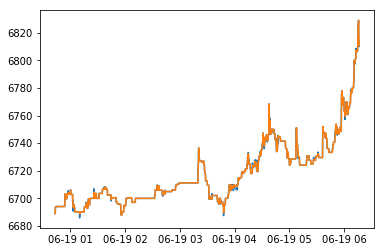

In [23]:
ROLL_MEAN_WINDOW_SIZE = 20
df['roll-mid'] = df['mid'].rolling(ROLL_MEAN_WINDOW_SIZE).mean()
plt.plot_date(df['time'], df['mid'], fmt='-')
plt.plot_date(df['time'], df['roll-mid'], fmt='-')

In [54]:
y = df['roll-mid'].shift(-ROLL_MEAN_WINDOW_SIZE) - df['mid']
y = y.round(decimals=8) # make things close to zero (floating point error) actually zero
y[0:2]

0    0.0
1    0.0
dtype: float64

In [55]:
OI_FEATURES = 5 # how many timesteps back do we use OI
X = np.zeros((df.shape[0], OI_FEATURES))
for i in range(OI_FEATURES):
    X[:, i] = df['oi'].shift(i).values

In [57]:
model = sm.OLS(y, sm.add_constant(X), missing = 'drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     179.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):          2.84e-189
Time:                        16:37:38   Log-Likelihood:                -51006.
No. Observations:               39975   AIC:                         1.020e+05
Df Residuals:                   39969   BIC:                         1.021e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0364      0.004      8.398      0.0

In [48]:
np.zeros((2,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])